# Multi Variable Linear Regression

## Goal

We're given a dataset that has x and y. Example:

|  x1  | x2 | x3 | x4 |  y  |
|------|----|----|----|-----|
| 2104 | 5  | 1  | 45 | 460 |
| 1416 | 3  | 2  | 40 | 232 |
| 852  | 2  | 1  | 35 | 178 |


Now we want to fit the best variable linear regression for the given data. Model (here n = 4):

$$ f_{w,b}(x^{(i)}) = w_1 x_1^{(i)} + w_2 x_2^{(i)} + ... + w_n x_n^{(i)} + b $$


## Definitions

We imagine we have **m** training data. Also, our function has **n** variables.
To show all of x training data we use capital bold **X** which is a matrix:

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$

 We also define a bold $\mathbf{x^{(i)}}$ to show list of all training data for a training set and a bold **w**. 

$$\mathbf{x}^{(i)} = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$$

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$


Also, we know that dot production of two vector is equal to:

$$ \mathbf{w} \cdot \mathbf{x^{(i)}} = \sum_{j=0}^{n} (w_j x_j^{(i)}) $$

And we can write our model as:

$$ f_{\mathbf{w}, b}(\mathbf{x^{(i)}}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b$$

## Solution

Now we know that our cost function is defined as below:

$$ J_{\mathbf{w}, b} = \frac{1}{2m} \sum_{i=0}^{m-1}(f_{\mathbf{w}, b}(\mathbf{x^{(i)}}) - y^{(i)})^2$$

Now we need to calculate each of $ \frac {\partial J_{\mathbf{w}, b}} {\partial w_1} $ ,$ \frac {\partial J_{\mathbf{w}, b}} {\partial w_2} $, ... ,$ \frac {\partial J_{\mathbf{w}, b}} {\partial w_n} $, $ \frac {\partial J_{\mathbf{w}, b}} {\partial b} $. 

$$ \frac {\partial J_{\mathbf{w}, b}} {\partial w_1} = \frac{\partial}{\partial w_1} ( \frac{1}{2m} \sum_{i=0}^{m-1}(f_{\mathbf{w}, b}(\mathbf{x^{(i)}}) - y^{(i)})^2)$$

$$ \frac {\partial J_{\mathbf{w}, b}} {\partial w_1} = \frac{\partial}{\partial w_1} ( \frac{1}{2m} \sum_{i=0}^{m-1}(w_1 x_1 ^{(i)} + w_2 x_2^{(i)} + ... + w_n x_n^{(i)} - y^{(i)})^2)$$


$$ \frac {\partial J_{\mathbf{w}, b}} {\partial w_1} = \frac{1}{m} \sum_{i=0}^{m-1}(w_1 x_1^{(i)} + w_2 x_2^{(i)} + ... + w_n x_n^{(i)} - y^{(i)}) \times x_1 ^ {(i)}$$

By replacing $f_{w,b}$ we get:

$$\frac {\partial J_{\mathbf{w}, b}} {\partial w_1} = \frac{1}{m} \sum_{i=0}^{m-1}(f_{\mathbf{w}, b}(\mathbf{x^{(i)}}) - y^{(i)}) \times x_1 ^ {(i)}$$

And we can generalize it so we get:


$$\Rightarrow \frac {\partial J_{\mathbf{w}, b}} {\partial w_n} = \frac{1}{m} \sum_{i=0}^{m-1}(f_{\mathbf{w}, b}(\mathbf{x^{(i)}}) - y^{(i)}) \times x_n ^ {(i)}$$

By repeating same steps for b, we get:


$$\Rightarrow \frac {\partial J_{\mathbf{w}, b}} {\partial b} = \frac{1}{m} \sum_{i=0}^{m-1}(f_{\mathbf{w}, b}(\mathbf{x^{(i)}}) - y^{(i)})$$

And from one linear regression, we are familiar with these formulas:

$$ w_n = w_n - \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_n} $$
$$ b = b - \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} $$


## Code
### Initial Code

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def f_wb(X, w, b):
    return np.dot(X,w) + b

In [69]:
def compute_cost(X_train, y_train, w, b):
    m = X_train.shape[0]
    cost = 0
    for i in range(m):
        error = np.dot(w, X_train[i]) + b - y_train[i]
        cost += error ** 2
    cost = cost / (2 * m)
    return cost

In [70]:
def compute_gradient(X_train, y_train, w, b):
    m = X_train.shape[0]
    dj_dw = np.zeros_like(X_train[0], dtype='float64')
    dj_db = 0.
    for i in range(m):
        error = np.dot(w, X_train[i]) + b - y_train[i]
        dj_dw += np.dot(error, X_train[i])
        dj_db += error
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [71]:
def fit_regression(X_train, y_train, initial_w, initial_b, alpha, iterations, record_step):
    w = initial_w
    b = initial_b
    J_history = []
    for iteration in range(iterations):
        # Save J for every 100 iteration:
        if (iteration % record_step == 0):
            J_history.append(compute_cost(X_train, y_train, w, b))
        dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    
    return w, b, J_history

In [72]:
def run_linear_regression(X_train, y_train, alpha, iterations, record_step=100):
    b_initial = 0.
    w_initial = np.zeros_like(X_train[0], dtype='float64')
    
    w, b, J_history = fit_regression(X_train, y_train, w_initial, b_initial, alpha, iterations, record_step)

    cost = compute_cost(X_train, y_train, w, b)
    print(f"cost: {cost}, alpha: {alpha}, iterations: {iterations}, w: {w}, b: {b}")

    # Learning Curve Function
    iteration = np.arange(0, iterations, record_step)
    J_history = np.array(J_history)
    plt.plot(iteration, J_history, color='blue', label='Learning Curve (Cost per iteration)')

    plt.xlabel('Iteration')
    plt.ylabel('Cost function')

    plt.legend()
    plt.show

cost: 555.2870188203724, alpha: 8e-07, iterations: 100000, w: [ 0.24206972  0.45253688 -1.31532538 -1.56988301], b: -0.03322988712405046


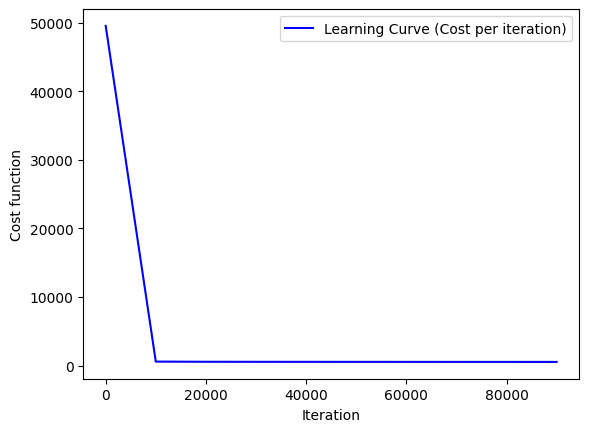

In [73]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])


alpha = 8.0e-7
iterations = 100_000

run_linear_regression(X_train, y_train, alpha, iterations, record_step=10_000)
# Note: Our initial values are very bad, specially our b, scaling makes it to work super better!

### Applying Scaling

Right now we have mutliple variables and each of them has a very wide range. By scaling we make our each of the training close to 0, which makes alpha works better and we get a better output with less iteration.

### Why Scaling is good!

1. First, as we saw earlier, our initial b value was very bad. And after a few iteration, learning curve, drops. When we scale our data around zero, our b is going to be close to zero as well, so it makes the code to find the correct b faster

2. We're using same alpha for all the variables. But their range is different, and when it takes a step for one of the variables, one of them might be super big and another super small. This make our alpha not be very good, but with scaling we make sure all of our steps are close to each other.


### Normalization Scaling

For feature **j**, we use this formula to scale each of training data:

$$ \tag{1} x^{(i)}_{\text{scaled},j} = \frac{x^{(i)}_j - \min{x_j}}{\max{x_j} - \min{x_j}} $$

So we get the following formula for $x_i$:

$$ x^{(i)}_j = x^{(i)}_{\text{scaled},j} \times (\max{x_j} - \min{x_j}) + \min{x_j} $$

Our function:

$$ f_{w,b}(x^{(i)}) = w_1 x_1^{(i)} + w_2 x_2^{(i)} + \ldots + w_n x_n^{(i)} + b $$

After Replacing Scaling for all features:

$$ f_{w,b}(x^{(i)}) = w_1 \left( x^{(i)}_{\text{scaled},1} \times (\max{x_1} - \min{x_1}) + \min{x_1} \right) + w_2 \left( x^{(i)}_{\text{scaled},2} \times (\max{x_2} - \min{x_2}) + \min{x_2} \right) + \ldots + w_n \left( x^{(i)}_{\text{scaled},n} \times (\max{x_n} - \min{x_n}) + \min{x_n} \right) + b $$

By making it to linear regression:

$$ f_{w,b}(x^{(i)}) = w_1 (\max{x_1} - \min{x_1} x^{(i)}_{\text{scaled},1}) + w_2 (\max{x_2} - \min{x_2}  x^{(i)}_{\text{scaled},2}) + \ldots + w_n (\max{x_n} - \min{x_n}  x^{(i)}_{\text{scaled},n}) + w_1 \min{x_1} + w_2 \min{x_2} + \ldots + w_n \min{x_n} + b $$

Now we introduce, scaled version of $w$:

$$ w_{\text{scaled},j} = w_j (\max{x_j} - \min{x_j}) $$

So for w_j we have:

$$ \tag{2} \Rightarrow w_j = \frac {w_{\text{scaled},j}}{\max{x_j} - \min{x_j}} $$

By replacing w_j:

$$ f_{w_\text{scaled},b}(x_\text{scaled}^{(i)}) = w_{\text{scaled},1} x^{(i)}_{\text{scaled},1} + w_{\text{scaled},2} x^{(i)}_{\text{scaled},2} + \ldots + w_{\text{scaled},n} x^{(i)}_{\text{scaled},n} + \frac {w_{\text{scaled},1} \min{x_1}} {\max{x_1} - \min{x_1}} + \frac {w_{\text{scaled},2} \min{x_2}} {\max{x_2} - \min{x_2}} + \ldots + \frac {w_{\text{scaled},n} \min{x_n}} {\max{x_n} - \min{x_n}} + b $$


Now by having $\mathbf{w_\text{scaled}}$ which is a vector of all of our $w_{\text{scaled},i}$:


$$
f_{\mathbf{w_\text{scaled}},b}(x_\text{scaled}^{(i)}) = \mathbf{w_\text{scaled}} \cdot \mathbf{x_\text{scaled}^{(i)}} + \mathbf{w_\text{scaled}} \cdot \frac{\min{\mathbf{x}}}{\max{\mathbf{x}} - \min{\mathbf{x}}} + b
$$

Now we introduct $b_\text{scaled}$:

$$ b_\text{scaled} = \mathbf{w_\text{scaled}} \cdot \frac {\min{\mathbf{x}}}{\max{\mathbf{x}} - \min{\mathbf{x}}} + b $$

So for our b we're going to have:

$$ \Rightarrow b = b_\text{scaled} - \mathbf{w_\text{scaled}} \cdot \frac {\min{\mathbf{x}}}{\max{\mathbf{x}} - \min{\mathbf{x}}} $$

Or simply if we have calculated $\mathbf{w}$ from the first formula we are going to have:

$$ \tag{3} b = b_\text{scaled} - \mathbf{w} \cdot \min{\mathbf{x}} $$


Finally we can get our function after using scaling:

$$ \tag{4} \Rightarrow f_{\mathbf{w_\text{scaled}},b_\text{scaled}} = \mathbf{w_\text{scaled}} \cdot \mathbf{x_\text{scaled}} + b_\text{scaled} $$


So after we calculated our regression using scaled data, we get $\mathbf{w_\text{scaled}}$ and $b_\text{scaled}$ after that using formula 1 and 2 we can denormalized our features to get the feature values for denormalized data.

In [74]:
def normalize_data(X_train):
    min_values = np.min(X_train, axis=0) # Array of minimum of each feature
    max_values = np.max(X_train, axis=0) # Array of maximum of each feature
    
    X_scaled = (X_train - min_values) / (max_values - min_values) # From (1) formula
    return X_scaled, min_values, max_values

X_scaled, min_values, max_values = normalize_data(X_train)
print(f"Normalized Data:\n {X_scaled}")

Normalized Data:
 [[1.         1.         0.         1.        ]
 [0.45047923 0.33333333 1.         0.5       ]
 [0.         0.         0.         0.        ]]


In [75]:
def normalize_features(w, b, min_values, max_values):
    w_scaled = w * (max_values - min_values)
    b_scaled = b + np.dot(w, min_values)
    
    return w_scaled, b_scaled

def denormalize_features(w_scaled, b_scaled, min_values, max_values):
    w = w_scaled / (max_values - min_values) # From (2) formula
    b = b_scaled - np.dot(w, min_values) # From (3) formula
    
    return w, b

### Standardization Scaling 

There is a better way of scaling, that uses Z-score to scale features. First lets define some famous statistic function (**m** is number of data we have):

**Population Mean**

$$ \mu = \frac{\sum_{i=0}^{m-1} x_i}{m} $$

**Standard Deviation:**

$$ \sigma = \sqrt{\frac{\sum_{i=0}^{m-1}(x_i - \mu)^2}{m}} $$

**Z-Score**

$$ Z = \frac{x - \mu}{\sigma} $$

In [76]:
print(f"Our data for the first feature: {X_train[:, 0]}")
print(f"Mean of the data: {np.mean(X_train, axis=0)[0]}")
print(f"Standard Deviation: {np.std(X_train, axis=0)[0]}")

Our data for the first feature: [2104 1416  852]
Mean of the data: 1457.3333333333333
Standard Deviation: 511.9618041308247


Now we use the Z as the $x_\text{scaled}$

$$\tag{1} \Rightarrow x_\text{scaled,j}^{(i)} = \frac{x^{(i)} - \mu(x_j)}{\sigma(x_j)} $$

We apply all the step above same as normalization, to get our answer for $\mathbf{w_\text{scaled}}$ and $b_\text{scaled}$:


So we get the following formula for $x_i$:

$$ x^{(i)}_j = x^{(i)}_{\text{scaled},j} \times \sigma(x_j) + \mu(x_j) $$

Our function:

$$ f_{w,b}(x^{(i)}) = w_1 x_1^{(i)} + w_2 x_2^{(i)} + \ldots + w_n x_n^{(i)} + b $$

After Replacing Scaling for all features:

$$ f_{w,b}(x^{(i)}) = w_1 \left( x^{(i)}_{\text{scaled},1} \times \sigma(x_1) + \mu(x_1) \right) +  w_1 \left( x^{(i)}_{\text{scaled},2} \times \sigma(x_2) + \mu(x_2) \right) + \ldots + w_n \left( x^{(i)}_{\text{scaled},n} \times \sigma(x_n) + \mu(x_n) \right) + b $$

By making it to linear regression:

$$ f_{w,b}(x^{(i)}) = w_1 \sigma(x_1) x^{(i)}_{\text{scaled},1} +  w_1 \sigma(x_2) x^{(i)}_{\text{scaled},2} + \ldots + w_n \sigma(x_n) x^{(i)}_{\text{scaled},n} + w_1 \mu(x_1) + w_2 \mu(x_2) + \ldots + w_n \mu(x_n) + b $$

Now we introduce, scaled version of $w$:

$$ w_{\text{scaled},j} = w_j \sigma(x_j) $$

So for w_j we have:

$$ \tag{2} \Rightarrow w_j = \frac {w_{\text{scaled},j}}{\sigma(x_j)} $$

By replacing w_j:

$$ f_{w_\text{scaled},b}(x_\text{scaled}^{(i)}) = w_{\text{scaled},1} x^{(i)}_{\text{scaled},1} + w_{\text{scaled},2} x^{(i)}_{\text{scaled},2} + \ldots + w_{\text{scaled},n} x^{(i)}_{\text{scaled},n} + w_1 \mu(x_1) + w_2 \mu(x_2) + \ldots + w_n \mu(x_n) + b $$

Now by having $\mathbf{w_\text{scaled}}$ which is a vector of all of our $w_{\text{scaled},i}$:


$$
f_{\mathbf{w_\text{scaled}},b}(x_\text{scaled}^{(i)}) = \mathbf{w_\text{scaled}} \cdot \mathbf{x_\text{scaled}^{(i)}} + \mathbf{w_\text{scaled}} \cdot \mu(\mathbf{x}) + b
$$

Now we introduct $b_\text{scaled}$:

$$ b_\text{scaled} = \mathbf{w_\text{scaled}} \cdot \mu(\mathbf{x}) + b $$

So for our b we're going to have:

$$ \Rightarrow b = b_\text{scaled} - \mathbf{w_\text{scaled}} \cdot \mu(\mathbf{x}) $$

Or simply if we have calculated $\mathbf{w}$ from the first formula we are going to have:

$$ \tag{3} b = b_\text{scaled} - \mathbf{w} \cdot \mu(\mathbf{x}) $$


Finally we can get our function after using scaling:

$$ \tag{4} \Rightarrow f_{\mathbf{w_\text{scaled}},b_\text{scaled}} = \mathbf{w_\text{scaled}} \cdot \mathbf{x_\text{scaled}} + b_\text{scaled} $$


So after we calculated our regression using scaled data, we get $\mathbf{w_\text{scaled}}$ and $b_\text{scaled}$ after that using formula 1 and 2 we can destandard (revert back to when the data wasn't standardize) our features to get the feature values for destandard data.


In [77]:
def standardize_data(X_train):
    mean_values = np.mean(X_train, axis=0) # Array of mean of each feature
    std_values = np.std(X_train, axis=0) # Array of standard deviation of each feature
    
    X_scaled = (X_train - mean_values) / std_values # From (1) formula
    return X_scaled, mean_values, std_values

In [78]:
def standardize_features(w, b, mean_values, std_values):
    w_scaled = w * std_values
    b_scaled = b + np.dot(w, mean_values)
    
    return w_scaled, b_scaled

def destandardize_features(w_scaled, b_scaled, mean_values, std_values):
    w = w_scaled / std_values # From (2) formula
    b = b_scaled - np.dot(w, mean_values) # From (3) formula
    
    return w, b

Now we update our `fit_regression` function to normalize/standardize (I'm not sure if that's a word!!!) our data on request, and revert the features for real data (basically revert back the $w_\text{scaled}$ and $b_\text{scaled}$: 

In [79]:
def fit_regression(X_train, y_train, initial_w, initial_b, alpha, iterations, record_step, scaling=None):
    # Apply scaling if needed:
    if scaling is None:
        X_scaled = X_train # No scaling
        w_scaled = initial_w
        b_scaled = initial_b
    elif scaling == 'normalize':
        X_scaled, min_values, max_values = normalize_data(X_train)
        w_scaled, b_scaled = normalize_features(initial_w, initial_b, min_values, max_values)
    elif scaling == 'standardize':
        X_scaled, mean_values, std_values = standardize_data(X_train)
        w_scaled, b_scaled = standardize_features(initial_w, initial_b, mean_values, std_values)
    else:
        raise ValueError("Invalid scaling option. Choose 'normalize', 'standardize', or None.")

        
    J_history = []
    for iteration in range(iterations):
        # Save J for every 100 iteration:
        if (iteration % record_step == 0):
            J_history.append(compute_cost(X_scaled, y_train, w_scaled, b_scaled))
        dj_dw, dj_db = compute_gradient(X_scaled, y_train, w_scaled, b_scaled)
        w_scaled = w_scaled - alpha * dj_dw
        b_scaled = b_scaled - alpha * dj_db
    
    # Denormalize w and b:
    if scaling is None:
        w = w_scaled
        b = b_scaled
    elif scaling == 'normalize':
        w, b = denormalize_features(w_scaled, b_scaled, min_values, max_values)
    elif scaling == 'standardize':
        w, b = destandardize_features(w_scaled, b_scaled, mean_values, std_values)
    return w, b, J_history

In [80]:
# We just need to update the run_linear_regression to pass the scaling option to fit_regression
def run_linear_regression(X_train, y_train, alpha, iterations, record_step=100, scaling=None):
    b_initial = 0.
    w_initial = np.zeros_like(X_train[0], dtype='float64')
    
    w, b, J_history = fit_regression(X_train, y_train, w_initial, b_initial, alpha, iterations, record_step, scaling)

    cost = compute_cost(X_train, y_train, w, b)
    print(f"cost: {cost}, alpha: {alpha}, iterations: {iterations}, w: {w}, b: {b}")

    # Learning Curve Function
    iteration = np.arange(0, iterations, record_step)
    J_history = np.array(J_history)
    plt.plot(iteration, J_history, color='blue', label='Learning Curve (Cost per iteration)')

    plt.xlabel('Iteration')
    plt.ylabel('Cost function')

    plt.legend()
    plt.show

cost: 1.0844838691504128, alpha: 0.1, iterations: 200, w: [  0.07443664  33.52669142 -63.04443067   9.00726692], b: -206.81850220376347


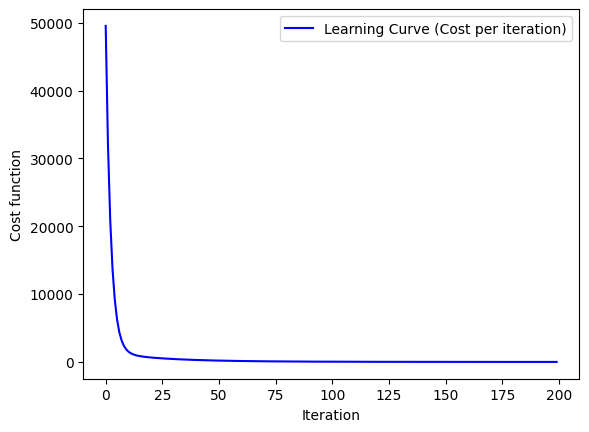

In [81]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

alpha = 0.1
iterations = 200

run_linear_regression(X_train, y_train, alpha, iterations, record_step=1, scaling='normalize')

cost: 2.104806083961064e-14, alpha: 0.1, iterations: 200, w: [  0.07432511  33.30872142 -65.73748272   8.90188038], b: -197.7707634382155


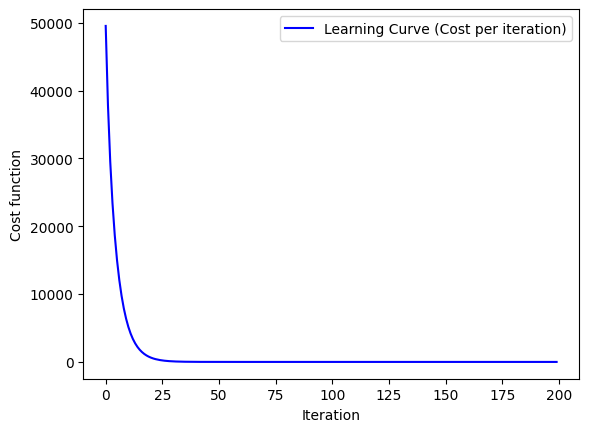

In [82]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

alpha = 0.1
iterations = 200

run_linear_regression(X_train, y_train, alpha, iterations, record_step=1, scaling='standardize')

Now we can see that without scaling with a super low alpha and a lot of iterations with got:  

``cost: 555.2870188203724, alpha: 8e-07, iterations: 100000``

For normalization with 0.1 alpha and 200 iterations:

``cost: 1.0844838691504128, alpha: 0.1, iterations: 200``

And the best one, standardization, with 0.1 alpha and 200 iteration, for cost we got:
``cost: 2.104806083961064e-14, alpha: 0.1, iterations: 200``


You can see how much scaling can improve our regression with a very lower iterations. Also, when our data is scaled, using a alpha 0.1 usually is something close to the best alpha and we don't need to try a lot of different alphas.

## Using Scikit-learn



In [88]:
from sklearn.linear_model import LinearRegression # Using close-form equation, which doesn't do any iteration and it's a mathematical solution 
from sklearn.linear_model import SGDRegressor # Using gradient descent with iteration

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

closed_form_model = LinearRegression() 
closed_form_model.fit(X_train,y_train)

alpha = 8.0e-7
iterations = 10_000
gradient_descent_model = SGDRegressor(max_iter=iterations, alpha=alpha) # With 10_000 iteration
gradient_descent_model.fit(X_train,y_train)

w_closed_form = closed_form_model.coef_
b_closed_form = closed_form_model.intercept_
cost_closed_form = compute_cost(X_train, y_train, w_closed_form, b_closed_form)

w_gradient_descent = gradient_descent_model.coef_
b_gradient_descent = gradient_descent_model.intercept_
cost_gradient_descent = compute_cost(X_train, y_train, w_gradient_descent, b_gradient_descent)


print(f"Closed-form equation: \ncost: {cost_closed_form} w: {w_closed_form}, b: {b_closed_form}")
print(f"Gradient Descent: \ncost: {cost_gradient_descent}, w: {w_gradient_descent}, b: {b_gradient_descent}")

Closed-form equation: 
cost: 1.2924697071141057e-26 w: [  0.39133535  18.75376741 -53.36032453 -26.42131618], b: 785.1811367994081
Gradient Descent: 
cost: [7.47372311e+28], w: [-2.46656499e+11  1.56316233e+09 -1.04692493e+10 -1.43469888e+11], b: [-4.92118812e+09]
